<a href="https://colab.research.google.com/github/sanath8107/strategies/blob/main/RSI%2BMACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a combination of RSI and MACD

We buy when
*   MACD line crosses signal line and
*   RSI is below 30

and we sell when

*   Signal line crosses the MACD line and
*   RSI is above 70





In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Load the data
from google.colab import files
uploaded=files.upload()

Saving SBI Historical Data.csv to SBI Historical Data.csv


In [3]:
# store the data into a df
df = pd.read_csv('SBI Historical Data.csv')
# set the date to be the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Price,Open,High,Low,Vol.,Change %
2018-10-12,"Oct 12, 2018",263.75,265.80,267.50,261.85,42.97M,0.61%
2018-10-11,"Oct 11, 2018",262.15,268.00,271.50,260.60,46.29M,-5.92%
2018-10-10,"Oct 10, 2018",278.65,261.60,280.45,261.20,31.77M,5.97%
2018-10-09,"Oct 09, 2018",262.95,268.00,268.15,260.00,16.01M,-1.05%
2018-10-08,"Oct 08, 2018",265.75,259.75,268.50,258.35,21.10M,2.86%
...,...,...,...,...,...,...,...
2000-09-19,"Sep 19, 2000",18.00,18.41,18.49,17.76,6.54M,-2.54%
2000-09-18,"Sep 18, 2000",18.47,18.73,18.73,18.41,3.15M,-1.96%
2000-09-15,"Sep 15, 2000",18.84,19.25,19.31,18.74,4.35M,-2.18%
2000-09-14,"Sep 14, 2000",19.26,19.46,19.67,19.15,7.03M,-0.82%


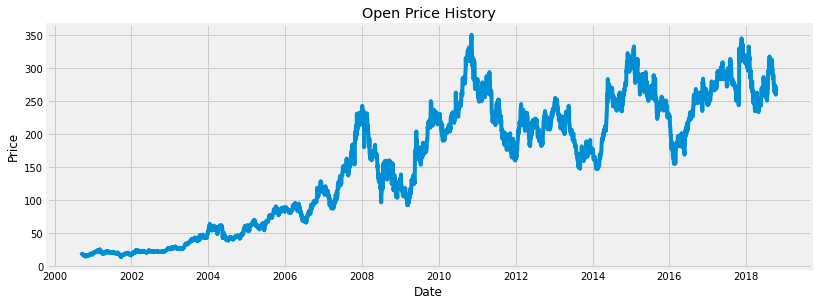

In [4]:
#Visually show the stock price
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Open'], label='Open')
plt.title('Open Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# **RSI**

In [5]:
prices = []
c = 0
# Add the closing prices to the prices list and make sure we start at greater than 2 dollars to reduce outlier calculations.
while c < len(df):
    if df.iloc[c,2] > float(0.00):
        prices.append(df.iloc[c,2])
    c += 1
i = 0
upPrices=[]
downPrices=[]
#  Loop to hold up and down price movements
while i < len(prices):
    if i == 0:
        upPrices.append(0)
        downPrices.append(0)
    else:
        if (prices[i]-prices[i-1])>0:
            upPrices.append(prices[i]-prices[i-1])
            downPrices.append(0)
        else:
            downPrices.append(prices[i]-prices[i-1])
            upPrices.append(0)
    i += 1
x = 0
avg_gain = []
avg_loss = []

while x < len(upPrices):
    if x <15:
        avg_gain.append(0)
        avg_loss.append(0)
    else:
        sumGain = 0
        sumLoss = 0
        y = x-14
        while y<=x:
            sumGain += upPrices[y]
            sumLoss += downPrices[y]
            y += 1
        avg_gain.append(sumGain/14)
        avg_loss.append(abs(sumLoss/14))
    x += 1

# calculate rs and rsi
p = 0
# RS = []
RSI = []
while p < len(prices):
    if p <15:
        # RS.append(0)
        RSI.append(0)
    else:
        RSvalue = (avg_gain[p]/avg_loss[p])
        # RS.append(RSvalue)
        RSI.append(100 - (100/(1+RSvalue)))
    p+=1

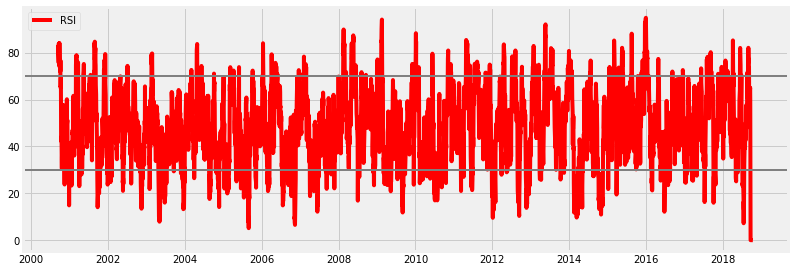

In [6]:
#plot rsi
rsi_upper_limit = 70
rsi_lower_limit = 30
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,RSI,label='RSI',color='red')
plt.axhline(y=rsi_upper_limit, linewidth=2, color='gray')
plt.axhline(y=rsi_lower_limit, linewidth=2, color='gray')
plt.legend(loc='upper left')
plt.show()

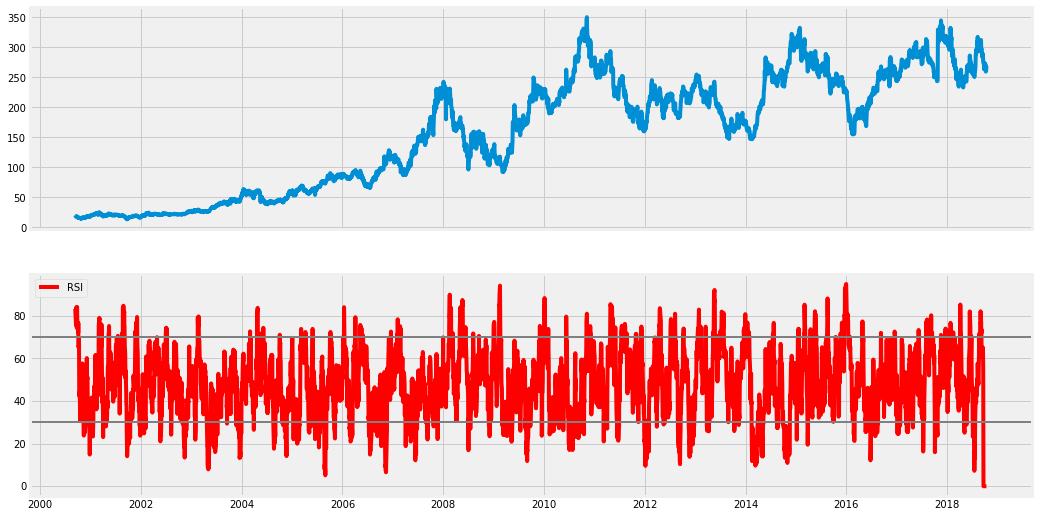

In [7]:
plt.figure(figsize=(16,9))
ax1 = plt.subplot(211)

ax1.plot(df['Open'], label='Open')
# ax1.title('Close Price History')
# plt.xlabel('Date')
# ax1.ylabel('Price')
plt.setp(ax1.get_xticklabels(), visible=False)


rsi_upper_limit = 70
rsi_lower_limit = 30
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(df.index,RSI,label='RSI',color='red')
ax2.axhline(y=rsi_upper_limit, linewidth=2, color='gray')
ax2.axhline(y=rsi_lower_limit, linewidth=2, color='gray')
ax2.legend(loc='upper left')

plt.show()

In [8]:
# add RSI to df
df['RSI'] = RSI

# **MACD**

In [9]:
#Calculate the MACD and Signal Line indicators
#calculate the short term exponential moving average (EMA)
ShortEMA=df.Open.ewm(span=12,adjust=False).mean()
#Calculate the long term exponential moving average(EMA)
LongEMA = df.Open.ewm(span=26,adjust=False).mean()
#Calculate the MACD line
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=9,adjust=False).mean()

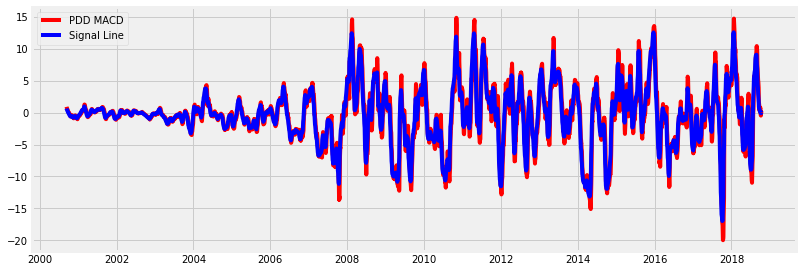

In [10]:
#plot the chart
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,MACD,label='PDD MACD',color='red')
plt.plot(df.index,signal,label='Signal Line',color = 'blue')
plt.legend(loc='upper left')
plt.show()

In [11]:
#Create new columns for the data
df['MACD'] = MACD
df['Signal Line'] = signal
#Show the data
df

,Date,Price,Open,High,Low,Vol.,Change %,RSI,MACD,Signal Line
2018-10-12,"Oct 12, 2018",263.75,265.80,267.50,261.85,42.97M,0.61%,0.000000,0.000000,0.000000
2018-10-11,"Oct 11, 2018",262.15,268.00,271.50,260.60,46.29M,-5.92%,0.000000,0.175499,0.035100
2018-10-10,"Oct 10, 2018",278.65,261.60,280.45,261.20,31.77M,5.97%,0.000000,-0.199544,-0.011829
2018-10-09,"Oct 09, 2018",262.95,268.00,268.15,260.00,16.01M,-1.05%,0.000000,0.019435,-0.005576
2018-10-08,"Oct 08, 2018",265.75,259.75,268.50,258.35,21.10M,2.86%,0.000000,-0.467342,-0.097929
...,...,...,...,...,...,...,...,...,...,...
2000-09-19,"Sep 19, 2000",18.00,18.41,18.49,17.76,6.54M,-2.54%,75.730337,0.637712,0.401944
2000-09-18,"Sep 18, 2000",18.47,18.73,18.73,18.41,3.15M,-1.96%,76.315789,0.683091,0.458173
2000-09-15,"Sep 15, 2000",18.84,19.25,19.31,18.74,4.35M,-2.18%,81.135903,0.752342,0.517007
2000-09-14,"Sep 14, 2000",19.26,19.46,19.67,19.15,7.03M,-0.82%,82.387476,0.814776,0.576561


In [12]:
#Create a function to signal when to buy adn sell an asset
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0,len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1 and signal['RSI'][i] <= 30:
        print("buy: ", signal['RSI'][i])
        Buy.append(signal['Open'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0 and signal['RSI'][i] >= 70:
        print("sell: ", signal['RSI'][i] )
        Sell.append(signal['Open'][i])
        flag = 0
      else:
        Sell.append(np.nan) 
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
    
  return (Buy,Sell)

In [13]:
#Create Buy and sell column
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

buy:  0.0
sell:  71.54255319148936
buy:  22.9141229141229
sell:  79.83761840324766
buy:  28.277153558052433
sell:  71.76960970064421
buy:  27.0725740690405
sell:  72.67969295184926
buy:  28.492008339124382
sell:  72.61219792865363
buy:  18.81671241232081
sell:  83.75886524822694
buy:  27.294685990338166


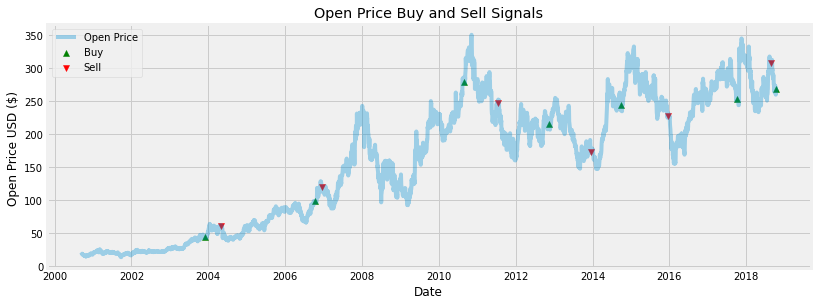

In [14]:
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index,df['Buy_Signal_Price'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(df.index,df['Sell_Signal_Price'],color='red',label='Sell',marker='v',alpha=1)
plt.plot(df['Open'],label='Open Price',alpha=0.35)
plt.title('Open Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Open Price USD ($) ')
plt.legend(loc='upper left')
plt.show()